In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('./datasets/training.xlsx', sheet_name='Data')

In [4]:
# Xóa dấu phẩy trong dữ liệu và chuyển đổi sang kiểu số
df['Load'] = pd.to_numeric(df['Load'].astype(str).str.replace(',', ''), errors='coerce')

# List temperature columns explicitly from your provided structure
temp_columns = ['Site-1 Temp', 'Site-2 Temp', 'Site-3 Temp', 'Site-4 Temp', 'Site-5 Temp']
GHI_columns = ['Site-1 GHI', 'Site-2 GHI', 'Site-3 GHI', 'Site-4 GHI', 'Site-5 GHI']

# Compute correlations with Load
correlations = {site: df[site].corr(df['Load']) for site in temp_columns}
correlations2 = {site: df[site].corr(df['Load']) for site in GHI_columns}
for site in temp_columns:
    corr = df[site].corr(df['Load'])
    print(f"Correlation between {site} and Load: {corr:.4f}")
    
# Convert to pandas Series for easy plotting
correlation_series = pd.Series(correlations)
correlation_series2 = pd.Series(correlations2)

Correlation between Site-1 Temp and Load: 0.3967
Correlation between Site-2 Temp and Load: 0.3963
Correlation between Site-3 Temp and Load: 0.4007
Correlation between Site-4 Temp and Load: 0.3963
Correlation between Site-5 Temp and Load: 0.4038


Nhận xét các hệ số tương quan trên:

* **Tất cả các giá trị đều dương (~0.39–0.40)** → nghĩa là **Load (tải tiêu thụ điện)** **tăng nhẹ khi nhiệt độ tăng**.
* Mức tương quan khoảng **0.39–0.40** cho thấy **mối quan hệ tuyến tính yếu đến trung bình**, không quá mạnh nhưng có xu hướng rõ ràng.
* **Site-5 Temp (0.4038)** có tương quan cao nhất → tức là nhiệt độ tại trạm này có **ảnh hưởng lớn nhất đến Load** so với các trạm còn lại.
* Các site còn lại có giá trị tương quan rất gần nhau → cho thấy **mẫu hình nhiệt độ giữa các site khá đồng nhất**, nên Load phản ứng tương tự theo nhiệt độ của từng site.

👉 **Tóm tắt:**

> Khi nhiệt độ tăng, Load có xu hướng tăng nhẹ. Tuy nhiên, mối quan hệ không quá mạnh — điều này có thể do Load còn phụ thuộc vào nhiều yếu tố khác (GHI, thời gian, thói quen sử dụng điện,…).


In [5]:
#------so sánh mức độ tương đối của tương quan giữa Load và nhiệt độ tại từng trạm----#


# Take absolute values of correlations
abs_corr = correlation_series.abs()
abs_corr2 = correlation_series2.abs()

# Chuẩn hóa về tỷ lệ phần trăm tổng bằng 1- 
# Mục tiêu:
#  xem từng site đóng góp bao nhiêu phần trăm trong tổng độ tương quan của tất cả các site.
comparative_corr = abs_corr / abs_corr.sum()
comparative_corr2 = abs_corr2 / abs_corr2.sum()

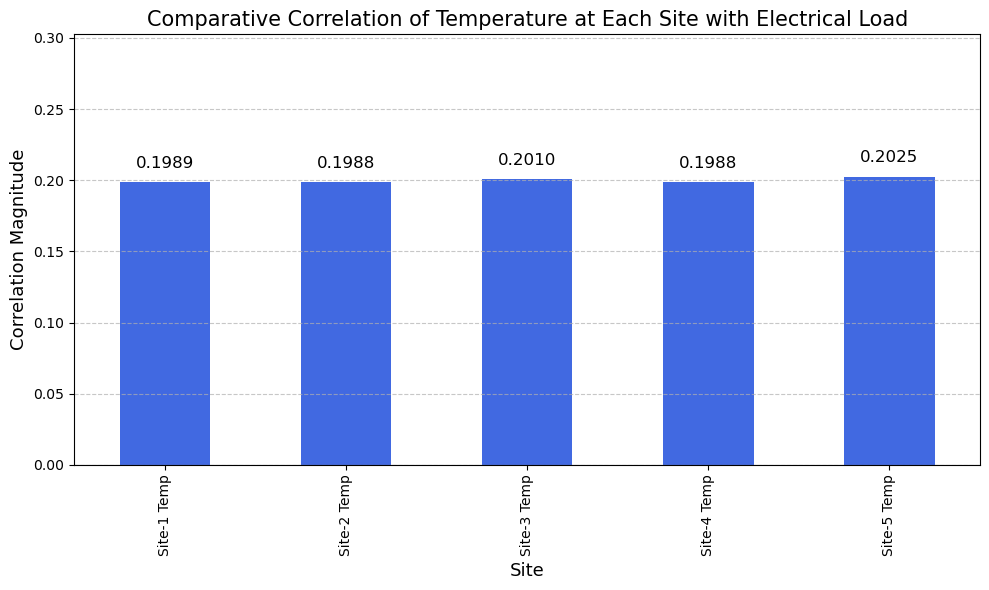

In [6]:
plt.figure(figsize=(10, 6))
comparative_corr.plot(kind='bar', color='royalblue')

# Graph Details
plt.title('Comparative Correlation of Temperature at Each Site with Electrical Load', fontsize=15)
plt.xlabel('Site', fontsize=13)
plt.ylabel('Correlation Magnitude', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8)
plt.ylim(0, comparative_corr.max() + 0.1)  # Ensuring scale reflects correlation range
for index, value in enumerate(comparative_corr):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

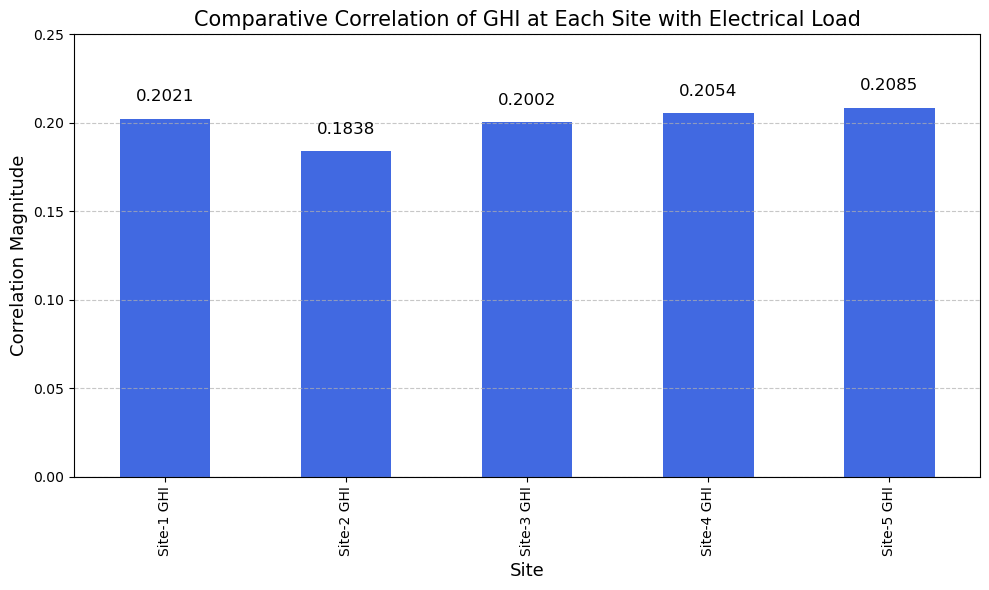

In [ ]:
# so sánh mức độ tương quan giữa GHI (Global Horizontal Irradiance — bức xạ mặt trời) 
# của từng trạm với Load (tải điện).

plt.figure(figsize=(10, 6))
comparative_corr2.plot(kind='bar', color='royalblue')

# Graph Details
plt.title('Comparative Correlation of GHI at Each Site with Electrical Load', fontsize=15)
plt.xlabel('Site', fontsize=13)
plt.ylabel('Correlation Magnitude', fontsize=13)
plt.ylim(0, 0.25)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8)
for index, value in enumerate(comparative_corr2):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Biểu đồ thể hiện mức độ tương quan giữa Load và GHI (bức xạ mặt trời) tại từng site.

Cột càng cao → site đó có tương quan mạnh hơn → bức xạ tại site đó ảnh hưởng nhiều hơn đến Load.

Nếu các cột gần bằng nhau → Load chịu ảnh hưởng tương đối đồng đều từ các site GHI.